In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("Q1.xlsx")
df=df.sample(frac=1,random_state=75).reset_index(drop=True)
print(df)

X=df.drop("Y",axis=1).values.astype(float)
Y=df["Y"].values.astype(float)
Y=np.expand_dims(Y,axis=1)
print(X)
min=np.min(X,axis=0)
print(min)
max=np.max(X,axis=0)
print(max)

       X1     X2     X3     X4   X5  X6    X7  X8      Y
0    0.64  784.0  343.0  220.5  3.5   5  0.40   3  18.46
1    0.74  686.0  245.0  220.5  3.5   2  0.40   2  14.54
2    0.82  612.5  318.5  147.0  7.0   4  0.00   0  16.95
3    0.82  612.5  318.5  147.0  7.0   3  0.10   4  22.80
4    0.90  563.5  318.5  122.5  7.0   3  0.10   4  28.05
..    ...    ...    ...    ...  ...  ..   ...  ..    ...
763  0.64  784.0  343.0  220.5  3.5   2  0.10   2  15.41
764  0.69  735.0  294.0  220.5  3.5   3  0.25   4  12.95
765  0.79  637.0  343.0  147.0  7.0   5  0.00   0  28.75
766  0.69  735.0  294.0  220.5  3.5   2  0.25   2  12.85
767  0.86  588.0  294.0  147.0  7.0   2  0.10   5  27.03

[768 rows x 9 columns]
[[6.400e-01 7.840e+02 3.430e+02 ... 5.000e+00 4.000e-01 3.000e+00]
 [7.400e-01 6.860e+02 2.450e+02 ... 2.000e+00 4.000e-01 2.000e+00]
 [8.200e-01 6.125e+02 3.185e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [7.900e-01 6.370e+02 3.430e+02 ... 5.000e+00 0.000e+00 0.000e+00]
 [6.900e-01 7.350e+

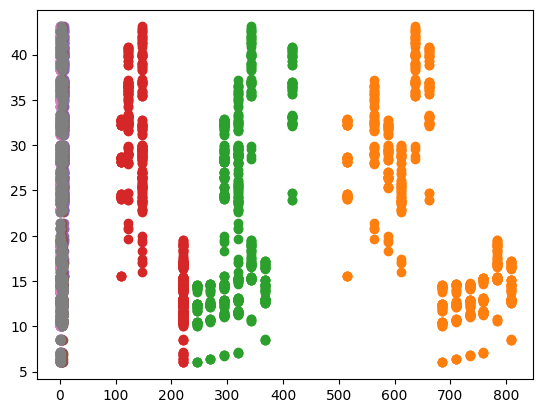

In [4]:
for i in range(8):
    plt.scatter(df.iloc[:,i].values,df["Y"].values)
plt.show()

In [5]:
min=np.min(X,axis=0)
print(min)
max=np.max(X,axis=0)
print(max)

[  0.62 514.5  245.   110.25   3.5    2.     0.     0.  ]
[9.800e-01 8.085e+02 4.165e+02 2.205e+02 7.000e+00 5.000e+00 4.000e-01
 5.000e+00]


[  0.62 514.5  245.   110.25   3.5    2.     0.     0.  ]
[9.800e-01 8.085e+02 4.165e+02 2.205e+02 7.000e+00 5.000e+00 4.000e-01
 5.000e+00]
[0. 0. 0. 0. 0. 0. 0. 0.]


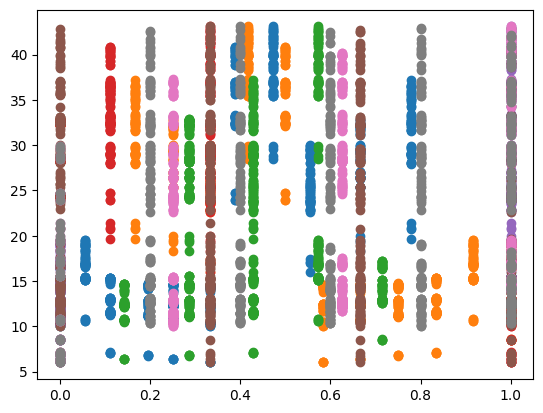

[[0.05555556 0.91666667 0.57142857 ... 1.         0.6        1.        ]
 [0.33333333 0.58333333 0.         ... 1.         0.4        1.        ]
 [0.55555556 0.33333333 0.42857143 ... 0.         0.         1.        ]
 ...
 [0.47222222 0.41666667 0.57142857 ... 0.         0.         1.        ]
 [0.19444444 0.75       0.28571429 ... 0.625      0.4        1.        ]
 [0.66666667 0.25       0.28571429 ... 0.25       1.         1.        ]]


In [6]:
class MinMaxScaler:
    def __init__(self):
        self.mins=None
        self.maxs=None
    def fit_transform(self,X):
        min=np.min(X,axis=0)
        self.mins=min
        print(min)
        max=np.max(X,axis=0)
        self.maxs=max
        print(max)
        return (X-min)/(max-min)
    def transform(self,x):
        return (x-self.mins)/(self.maxs-self.mins)
scaler = MinMaxScaler()  
X=scaler.fit_transform(X)
min=np.min(X,axis=0)
print(min)
for i in range(8):
    plt.scatter(X[:,i],Y)
plt.show()
ones=np.ones((X.shape[0],1))
X=np.column_stack((X,ones))
print(X)

In [7]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2
# seperating traing set for 70%
x_train,xtem,y_train,ytem=train_test_split(X,Y,split=0.7)
print(x_train.shape,y_train.shape)
# seperating cross validation(15%) and testing set(15%) split=0.5
x_val,x_test,y_val,y_test=train_test_split(xtem,ytem,split=0.5)
print(x_test.shape,y_test.shape)

(537, 9) (537, 1)
(116, 9) (116, 1)


In [8]:
theta=np.zeros((X.shape[1],1)) # defined theta for parameters

def h(xi,theta):
    xi=np.expand_dims(xi,axis=0)
    # xi will be an matrix so x_i.shape == (1,9)
    r=xi@theta
    return r[0][0]

def error(X,theta,Y):
    r=((X@theta-Y).T @ (X@theta-Y))/X.shape[0]
    return r[0][0]

print(h(x_train[0],theta),error(X,theta,Y))

0.0 599.2906108802084


Q1 part 1

In [9]:
XtX = x_train.T @ x_train
print("cond(X^T X) =", np.linalg.cond(XtX))
# conditioning value is much high so we will use np.linalg.pinv(X)=(X.T@X)@X.T it will give an pseudo value

cond(X^T X) = 2.0605581368619108e+16


In [10]:

theta_1 = np.linalg.pinv(x_train.T @ x_train) @ (x_train.T @ y_train)
print(theta_1,theta_1.shape)
err=error(x_train,theta_1,y_train)
print(err)
print(error(x_val,theta_1,y_val))
print(error(x_test,theta_1,y_test))


[[-22.35681288]
 [-10.62300241]
 [  2.17456831]
 [ -9.47124937]
 [ 15.38642073]
 [  0.073214  ]
 [  7.42905737]
 [  1.49957227]
 [ 28.72838136]] (9, 1)
8.4736735781812
8.184453510411418
9.468625586907637


Q1 part 2

In [19]:
class linear_regression_model:
    def __init__(self):
        self.weights=None
        self.alpha=None
        self.error_T=[]
        self.error_val=[]
        self.epochs=None
    def fit(self,xt,yt,xv,yv,alpha,epochs):
        self.weights=np.zeros((xt.shape[1],1)) # weight initialization
        self.alpha=alpha
        self.epochs=epochs
        for i in range(self.epochs):
            m=xt.shape[0]
            self.weights-=(self.alpha*2/(m))*(xt.T@(xt@self.weights-yt))
            train_err=error(xt,self.weights,yt)
            val_err=error(xv,self.weights,yv)
            self.error_T.append(train_err)
            self.error_val.append(val_err)
            print(f"Epoch {i+1}/{self.epochs} | Train Error: {train_err:.4f} | Val Error: {val_err:.4f}")
    def training_history(self):
        return self.error_T
    def validation_history(self):
        return self.error_val
    def weightsa(self):
        return self.weights
    def prediction(self,x):
            return x@self.weights
    def prediction_for_without_scaled(self,x):
            x=scaler.transform(x)
            return x@self.weights
    def errorplot(self):
        epoch=np.arange(1,self.epochs+1)
        plt.plot(epoch,self.error_T,label='training error')
        plt.plot(epoch,self.error_val,label='validation error')
        plt.xlabel("epochs")
        plt.ylabel("error")
        plt.title("error vs epochs")
        plt.legend()
        plt.show()

In [ ]:
linear_regression=linear_regression_model()
linear_regression.fit(x_train,y_train ,x_val ,  y_val , alpha=0.31,epochs=30000)
linear_regression.errorplot()

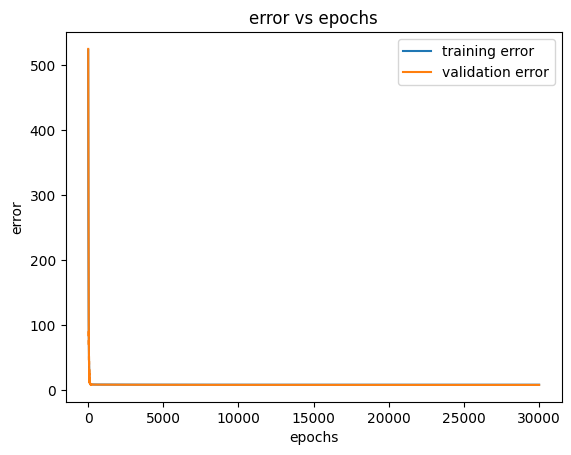

[[-22.35681288]
 [-10.62300241]
 [  2.17456831]
 [ -9.47124937]
 [ 15.38642073]
 [  0.073214  ]
 [  7.42905737]
 [  1.49957227]
 [ 28.72838136]]
[[-22.16875586]
 [-10.492052  ]
 [  2.20844551]
 [ -9.37648637]
 [ 15.4331001 ]
 [  0.07312018]
 [  7.42930149]
 [  1.50024739]
 [ 28.48768265]]


In [22]:
linear_regression.errorplot()
print(theta_1)
theta_2=linear_regression.weights
print(theta_2)


In [23]:
training_error=error(x_train,theta_2,y_train)
validation_error=error(x_val,theta_2,y_val)
testing_error=error(x_test,theta_2,y_test)
print(training_error)
print(validation_error)
print(testing_error)

8.47370414807211
8.186645384939105
9.469558808604578
